Slope (m): 6.00
Intercept (c): 25.00
Predicted salary for 6 years experience: £61,000


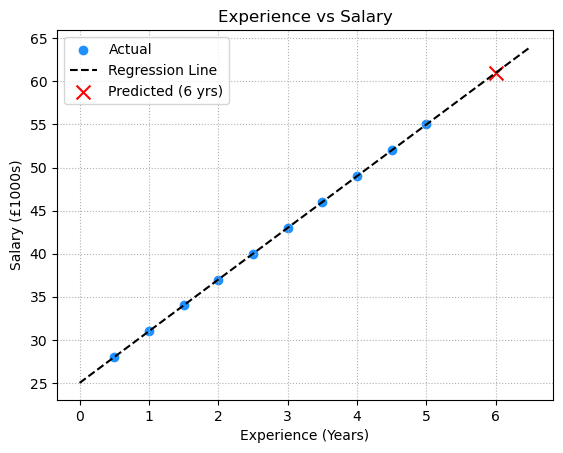

In [4]:
# Importing necessary Python libraries

import pandas as pd                      # For handling tabular data (not strictly used here but often helpful)
import numpy as np                       # For numerical operations and array handling
import matplotlib.pyplot as plt          # For creating visual plots
from sklearn.linear_model import LinearRegression  # Importing the linear regression model from scikit-learn

# Creating the input data: years of experience
# Reshaped into a column vector (2D) because scikit-learn expects it in this form
X = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]).reshape(-1, 1)

# Target data: salary values in thousands of pounds (£)
# These are the "known outcomes" the model will learn to predict
y = np.array([28, 31, 34, 37, 40, 43, 46, 49, 52, 55])

# Creating an instance of the LinearRegression model
model = LinearRegression()

# Fitting the model to the data — this is where it learns the best-fit line
model.fit(X, y)

# Displaying the parameters of the learned line: slope and intercept
# Slope (m) shows how much salary increases per year of experience
# Intercept (c) is where the line crosses the y-axis (i.e. salary with 0 experience)
print(f"Slope (m): {model.coef_[0]:.2f}")
print(f"Intercept (c): {model.intercept_:.2f}")

# Making a prediction for someone with 6 years of experience
years = np.array([[6]])                 # Input must be 2D for prediction
predicted_salary = model.predict(years)[0]  # Predict and get the single value

# Output the predicted salary converted to full £ value with thousands separator
print(f"Predicted salary for 6 years experience: £{predicted_salary * 1000:,.0f}")

# PLOTTING SECTION
# ----------------

# Plotting the original data points
plt.scatter(X, y, color='dodgerblue', label='Actual')   # Blue dots for known salaries

# Creating a smooth line across a range of experience values (0 to 6.5)
x_range = np.linspace(0, 6.5, 100).reshape(-1, 1)
y_pred_line = model.predict(x_range)

# Plotting the regression line
plt.plot(x_range, y_pred_line, color='black', linestyle='--', label='Regression Line')

# Highlighting the prediction for 6 years
plt.scatter(6, predicted_salary, color='red', marker='x', s=100, label='Predicted (6 yrs)')

# Adding titles and axis labels
plt.title("Experience vs Salary")
plt.xlabel("Experience (Years)")
plt.ylabel("Salary (£1000s)")

# Enabling grid and legend for clarity
plt.grid(True, linestyle=':')           # Light dotted grid for easier reading
plt.legend()                            # Show legend with labels defined above

# Displaying the plot
plt.show()




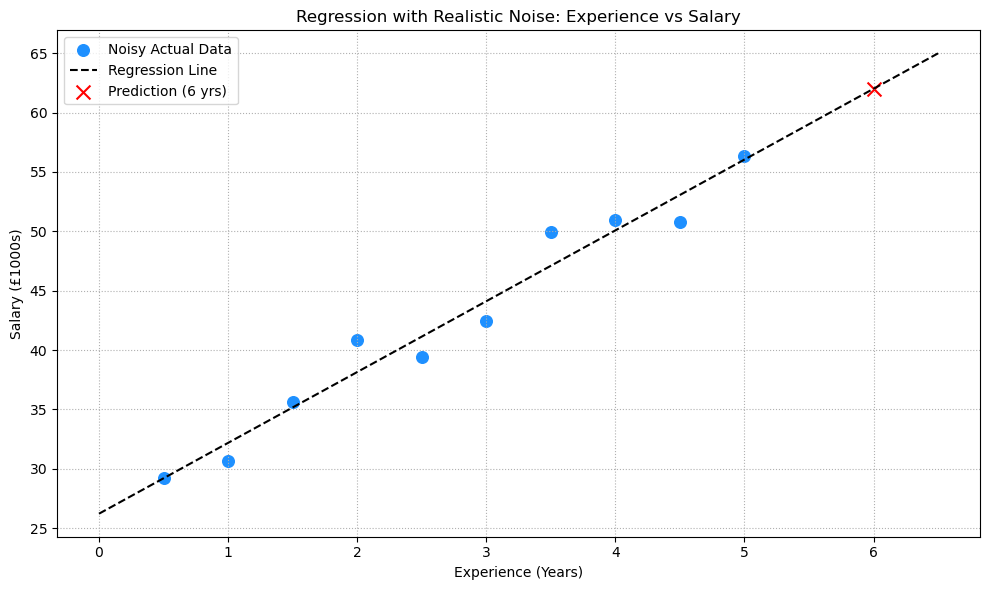

Slope (m): 5.97
Intercept (c): 26.22
Predicted Salary (6 yrs): £62,008
R² Score: 0.962


,Slope (m),Intercept (c),Predicted Salary (6 yrs),R² Score
0,5.97,26.22,"£62,008",0.962


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# --- Generate original data ---
X = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]).reshape(-1, 1)
y_true = np.array([28, 31, 34, 37, 40, 43, 46, 49, 52, 55])

# --- Add random noise to simulate real-world variation ---
np.random.seed(42)  # ensures reproducibility
y_noisy = y_true + np.random.normal(loc=0, scale=2.5, size=y_true.shape)

# --- Fit linear regression to noisy data ---
model_noisy = LinearRegression()
model_noisy.fit(X, y_noisy)

# --- Predict a value (e.g. 6 years experience) ---
years_to_predict = np.array([[6]])
predicted_salary_noisy = model_noisy.predict(years_to_predict)[0]

# --- Calculate R² score for evaluation ---
r2 = r2_score(y_noisy, model_noisy.predict(X))

# --- Plot original noisy data ---
plt.figure(figsize=(10, 6))
plt.scatter(X, y_noisy, color='dodgerblue', label='Noisy Actual Data', s=70)

# --- Plot regression line ---
x_range = np.linspace(0, 6.5, 100).reshape(-1, 1)
y_line = model_noisy.predict(x_range)
plt.plot(x_range, y_line, color='black', linestyle='--', label='Regression Line')

# --- Plot predicted point (6 years) ---
plt.scatter(6, predicted_salary_noisy, color='red', marker='x', s=100, label='Prediction (6 yrs)')

# --- Labels and styling ---
plt.title("Regression with Realistic Noise: Experience vs Salary")
plt.xlabel("Experience (Years)")
plt.ylabel("Salary (£1000s)")
plt.grid(True, linestyle=':')
plt.legend()
plt.tight_layout()
plt.show()

# --- Output regression coefficients and R² score ---
model_results = {
    "Slope (m)": round(model_noisy.coef_[0], 2),
    "Intercept (c)": round(model_noisy.intercept_, 2),
    "Predicted Salary (6 yrs)": f"£{predicted_salary_noisy * 1000:,.0f}",
    "R² Score": round(r2, 3)
}

for key, value in model_results.items():
    print(f"{key}: {value}")


import pandas as pd
pd.DataFrame([model_results])
